In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
df = pd.read_csv('times.csv')

timeout = df[df['totalTime'] < 0]

df = df[df['totalTime'] > 0] # remove Timeouts

# Normalize rootTime, cleaningTime, packingTime, flowerTime, digraphTime, busyCycleBranchingTime, cycleSearchTime
df['rootTime_norm'] = df['rootTime']/df['totalTime']
df['cleaningTime_norm'] = df['cleaningTime']/df['totalTime']
df['packingTime_norm'] = df['packingTime']/df['totalTime']
df['flowerTime_norm'] = df['flowerTime']/df['totalTime']
df['digraphTime_norm'] = df['digraphTime']/df['totalTime']
df['busyCycleBranchingTime_norm'] = df['busyCycleBranchingTime']/df['totalTime']
df['cycleSearchTime_norm'] = df['cycleSearchTime']/df['totalTime']

# smoothing
smooth = 15 # number of instances to smooth over

comp_protion = np.zeros(len(df))
x = df['name'].to_numpy()
for ind in range(len(df)):
    comp_protion[ind] = np.sum(['complex' in i for i in x[max(0, ind - smooth):min(len(df), ind+1+smooth)]])/(min(len(df), ind+smooth)+1 - max(0, ind - smooth))

df = df.sort_values('totalTime', ascending=False)
for col in df.columns:
    if 'norm' not in col:
        continue
    x = df[col].to_numpy()
    y = np.zeros(len(df))
    for ind in range(len(df)):
        y[ind] = np.sum(x[max(0, ind - smooth):min(len(df), ind+1+smooth)])/(min(len(df), ind+smooth)+1 - max(0, ind - smooth))
    df[col + '_smooth'] = y

df['other_smooth'] = 1 - df['rootTime_norm_smooth'] - df['cleaningTime_norm_smooth'] - df['packingTime_norm_smooth'] - df['flowerTime_norm_smooth'] - df['digraphTime_norm_smooth'] - df['busyCycleBranchingTime_norm_smooth'] - df['cycleSearchTime_norm_smooth']

df

,name,recursions,rootTime,cleaningTime,packingTime,flowerTime,digraphTime,busyCycleBranchingTime,cycleSearchTime,totalTime,...,busyCycleBranchingTime_norm,cycleSearchTime_norm,rootTime_norm_smooth,cleaningTime_norm_smooth,packingTime_norm_smooth,flowerTime_norm_smooth,digraphTime_norm_smooth,busyCycleBranchingTime_norm_smooth,cycleSearchTime_norm_smooth,other_smooth
795,./instances/synthetic3/synth-n_50-m_343-k_20-p...,881575,3201100,38801166200,93346889300,7322080300,314008300,30069513500,200,179342541900,...,0.167665,1.115184e-09,0.297333,0.420904,0.187747,0.016271,0.001473,0.057197,2.756634e-09,0.019075
267,./instances/synthetic/synth-n_70-m_347-k_25-p_...,831626,3712000,57053993700,74879545000,3285979200,402949000,28538225300,300,176836021200,...,0.161382,1.696487e-09,0.280518,0.407265,0.206999,0.018929,0.002355,0.059713,2.790740e-09,0.024221
285,./instances/synthetic/synth-n_60-m_463-k_20-p_...,504632,8295200,32080295500,93713763400,8225642900,437994000,26040616300,100,167802306500,...,0.155186,5.959394e-10,0.301862,0.402806,0.195852,0.017877,0.002301,0.056395,3.009635e-09,0.022907
743,./instances/synthetic3/synth-n_1000-m_110357-k...,4,91523640700,63709886000,987156600,0,82107400,0,200,156350320000,...,0.000000,1.279179e-09,0.286350,0.412875,0.198836,0.018857,0.002354,0.057815,3.249083e-09,0.022913
794,./instances/synthetic3/synth-n_1300-m_95352-k_...,1,86776153200,54096089000,470114700,0,79951900,0,200,141455669800,...,0.000000,1.413871e-09,0.288743,0.424306,0.189781,0.017914,0.002276,0.055167,3.316039e-09,0.021814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,./instances/complex3/ChicagoRegional-n_100,0,18900,0,0,0,0,0,0,19100,...,0.000000,0.000000e+00,0.947788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.052212
642,./instances/complex3/chess-n_50,0,18700,0,0,0,0,0,0,18800,...,0.000000,0.000000e+00,0.945178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.054822
813,./instances/complex3/talk-oc-n_50,0,8600,0,0,0,0,0,0,8800,...,0.000000,0.000000e+00,0.942466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.057534
753,./instances/complex3/advotogo-n_50,0,8500,0,0,0,0,0,0,8600,...,0.000000,0.000000e+00,0.939269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.060731


In [148]:
comp_protion

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.96774194, 0.96774194, 0.93548387, 0.93548387, 0.90322581,
       0.90322581, 0.90322581, 0.90322581, 0.90322581, 0.90322581,
       0.90322581, 0.90322581, 0.90322581, 0.90322581, 0.90322581,
       0.90322581, 0.90322581, 0.90322581, 0.90322581, 0.90322581,
       0.90322581, 0.87096774, 0.83870968, 0.80645161, 0.77419355,
       0.74193548, 0.70967742, 0.70967742, 0.70967742, 0.70967742,
       0.67741935, 0.70967742, 0.67741935, 0.70967742, 0.67741935,
       0.70967742, 0.67741935, 0.67741935, 0.64516129, 0.61290323,
       0.61290323, 0.61290323, 0.58064516, 0.58064516, 0.5483871 ,
       0.5483871 , 0.5483871 , 0.5483871 , 0.51612903, 0.51612903,
       0.51612903, 0.48387097, 0.51612903, 0.5483871 , 0.5483871 ,
       0.58064516, 0.61290323, 0.64516129, 0.64516129, 0.64516

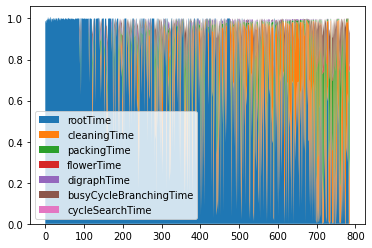

In [125]:
df = df.sort_values('totalTime', ascending=True)
#df = df[df['totalTime'] > 5**9]

#filt = ['complex' not in i for i in df['name']]

data = df#[filt]

plt.stackplot(range(len(data)), data['rootTime_norm'], data['cleaningTime_norm'],
              data['packingTime_norm'], data['flowerTime_norm'], data['digraphTime_norm'],
              data['busyCycleBranchingTime_norm'], data['cycleSearchTime_norm'], labels=['rootTime',
              'cleaningTime', 'packingTime', 'flowerTime', 'digraphTime', 'busyCycleBranchingTime', 'cycleSearchTime'])
plt.legend(loc='lower left')

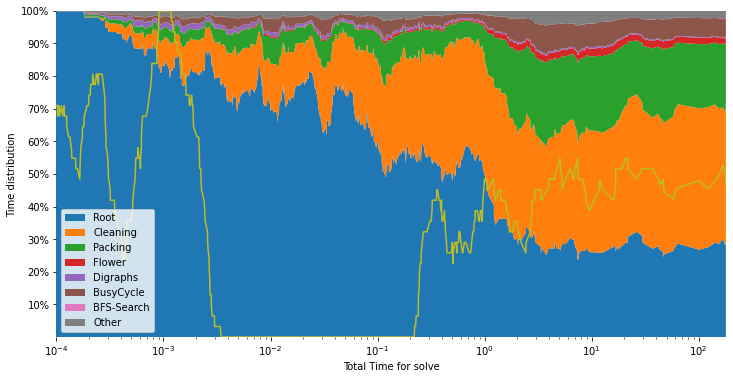

In [150]:
df = df.sort_values('totalTime', ascending=True)



data = df#[filt]

plt.figure(figsize=(12,6))
plt.stackplot(df['totalTime']/10**9, data['rootTime_norm_smooth'], data['cleaningTime_norm_smooth'],
              data['packingTime_norm_smooth'], data['flowerTime_norm_smooth'], data['digraphTime_norm_smooth'],
              data['busyCycleBranchingTime_norm_smooth'], data['cycleSearchTime_norm_smooth'], data['other_smooth'],
              labels=['Root', 'Cleaning', 'Packing', 'Flower',
                      'Digraphs', 'BusyCycle', 'BFS-Search', 'Other'])
plt.ylim([0,1])
plt.plot(df['totalTime']/10**9, comp_protion)
plt.xlim([10**-4, 180])
#plt.xticks([sum(df['totalTime'] < 10**8), sum(df['totalTime'] < 10**9), sum(df['totalTime'] < 5*10**9), sum(df['totalTime'] < 10**10), sum(df['totalTime'] < 10**11)], ['0.1s', '1s', '5s', '10s', '100s'])
plt.yticks([i/10 for i in range(1,11)], [str(i*10)+'%' for i in range(1,11)])
plt.xlabel('Total Time for solve')
plt.ylabel('Time distribution')
plt.xscale('log')
plt.box(False)
plt.legend(loc='lower left')

In [134]:
sum(df['totalTime'])

2106005944800

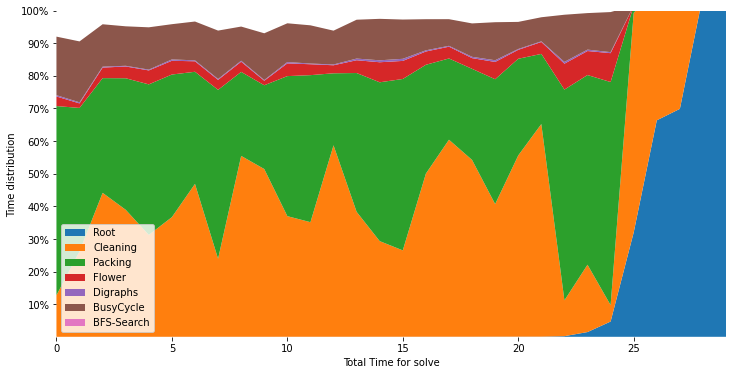

In [119]:
timeout = timeout.sort_values('rootTime', ascending=True)

timeout['rootTime_norm'] = timeout['rootTime']/(180*10**9)
timeout['cleaningTime_norm'] = timeout['cleaningTime']/(180*10**9)
timeout['packingTime_norm'] = timeout['packingTime']/(180*10**9)
timeout['flowerTime_norm'] = timeout['flowerTime']/(180*10**9)
timeout['digraphTime_norm'] = timeout['digraphTime']/(180*10**9)
timeout['busyCycleBranchingTime_norm'] = timeout['busyCycleBranchingTime']/(180*10**9)
timeout['cycleSearchTime_norm'] = timeout['cycleSearchTime']/(180*10**9)

data = timeout

plt.figure(figsize=(12,6))
plt.stackplot(range(len(data)), data['rootTime_norm'], data['cleaningTime_norm'],
              data['packingTime_norm'], data['flowerTime_norm'], data['digraphTime_norm'],
              data['busyCycleBranchingTime_norm'], data['cycleSearchTime_norm'],
              labels=['Root', 'Cleaning', 'Packing', 'Flower',
                      'Digraphs', 'BusyCycle', 'BFS-Search'])
plt.ylim([0,1])
plt.xlim([0,len(timeout)-1])
plt.yticks([i/10 for i in range(1,11)], [str(i*10)+'%' for i in range(1,11)])
plt.xlabel('Total Time for solve')
plt.ylabel('Time distribution')
plt.box(False)
plt.legend(loc='lower left')

In [118]:
timeout

,name,recursions,rootTime,cleaningTime,packingTime,flowerTime,digraphTime,busyCycleBranchingTime,cycleSearchTime,totalTime,firstLowerbound,firstDigraphNodes,firstCleans,rootTime_norm,cleaningTime_norm,packingTime_norm,flowerTime_norm,digraphTime_norm,busyCycleBranchingTime_norm,cycleSearchTime_norm
22,./instances/complex/biology-n_42-m_297-p_0.5-23,2110974,3420400,22945711500,104382522600,5298166000,712033800,32317062200,10100,-1,10,0,1,1.900222e+13,1.274762e+17,5.799029e+17,2.943426e+16,3.955743e+15,1.795392e+17,5.611111e+10
5,./instances/complex/biology-n_42-m_297-p_0.75-23,1870964,4791300,47182902600,79124397000,2490727700,597464800,33622149900,1300,-1,6,0,0,2.661833e+13,2.621272e+17,4.395800e+17,1.383738e+16,3.319249e+15,1.867897e+17,7.222222e+09
294,./instances/synthetic/synth-n_70-m_644-k_25-p_...,253934,8059300,79444519100,63302959800,5810329900,514595600,23402514900,7100,-1,12,0,0,4.477389e+13,4.413584e+17,3.516831e+17,3.227961e+16,2.858864e+15,1.300140e+17,3.944444e+10
150,./instances/synthetic/synth-n_90-m_558-k_25-p_...,332328,9017400,70088826500,72589231100,6498871800,373207800,21792108100,36200,-1,14,0,0,5.009667e+13,3.893824e+17,4.032735e+17,3.610484e+16,2.073377e+15,1.210673e+17,2.011111e+11
171,./instances/synthetic/synth-n_100-m_643-k_25-p...,396992,10902700,56245462200,83045283500,7704353000,446343800,23346335800,39600,-1,12,0,0,6.057056e+13,3.124748e+17,4.613627e+17,4.280196e+16,2.479688e+15,1.297019e+17,2.200000e+11
789,./instances/synthetic3/synth-n_100-m_691-k_25-...,212417,11102700,66033290100,78702677400,7592678100,740694000,19441090700,10200,-1,15,0,0,6.168167e+13,3.668516e+17,4.372371e+17,4.218154e+16,4.114967e+15,1.080061e+17,5.666667e+10
46,./instances/synthetic/synth-n_80-m_854-k_25-p_...,187451,13342300,84385985900,61863942200,5783963300,518805500,21425232600,48200,-1,18,0,0,7.412389e+13,4.688110e+17,3.436886e+17,3.213313e+16,2.882253e+15,1.190291e+17,2.677778e+11
178,./instances/synthetic/synth-n_120-m_492-k_30-p...,589945,14801800,43058913900,93220094400,5487460000,495729200,26714965100,3100,-1,14,0,0,8.223222e+13,2.392162e+17,5.178894e+17,3.048589e+16,2.754051e+15,1.484165e+17,1.722222e+10
486,./instances/synthetic/synth-n_120-m_921-k_25-p...,159923,15757700,99820492300,46358128100,5614206100,555396900,18851520000,39000,-1,11,0,0,8.754278e+13,5.545583e+17,2.575452e+17,3.119003e+16,3.085538e+15,1.047307e+17,2.166667e+11
20,./instances/complex/biology-n_59-m_624-p_0.75-1,594395,17028500,92579223500,46227037900,2483397600,398773300,25794792900,14400,-1,12,0,1,9.460278e+13,5.143290e+17,2.568169e+17,1.379665e+16,2.215407e+15,1.433044e+17,8.000000e+10
